## Init

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# %%capture
!pip install -q efficientnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 842.7 kB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
# import pickle
import scipy.io
import tarfile
# import csv
# # import sys
import os
import tensorflow as tf
# import tensorflow.keras as keras
import tensorflow.keras.models as M
import tensorflow.keras.layers as L
import tensorflow.keras.backend as K
import tensorflow.keras.callbacks as C
# from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import (
    LearningRateScheduler,
    ModelCheckpoint,
    EarlyStopping
)
# from tensorflow.keras.callbacks import Callback
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model
import efficientnet.tfkeras as efn
from sklearn.model_selection import train_test_split
import PIL
# from PIL import ImageOps, ImageFilter

In [4]:
os.chdir("/content/drive/MyDrive/3_XuLyAnh_Flowers")
os.getcwd()

'/content/drive/.shortcut-targets-by-id/1tU35xhAZwBdemxnc1j9Q3JzeU3wbyFMK/3_XuLyAnh_Flowers'

In [5]:
EPOCHS        = 5
BATCH_SIZE    = 8
LR_step1      = 1e-3
LR_step2      = 1e-4
LR_step3      = 1e-5
VAL_SPLIT     = 0.2
CLASS_NUM     = 15       #102
IMG_SIZE      = 224   #250    # (725*500)
IMG_CHANNELS  = 3
input_shape   = (IMG_SIZE, IMG_SIZE, IMG_CHANNELS)
RANDOM_SEED   = 42

## Data

In [ ]:
# https://www.kaggle.com/code/hobaak/flowerdetector-oxford-102-flowers

In [6]:
# https://www.kaggle.com/code/hobaak/flowerdetector-oxford-102-flowers/notebook
# flower_df = pd.read_csv('/kaggle/input/oxford-102-flower-name-index/oxford_flower_102_name.csv', header=0)
flower_index_dict = {1: 'pink primrose', 2: 'hard-leaved pocket orchid', 3: 'canterbury bells', 4: 'sweet pea', 5: 'english marigold', 6: 'tiger lily', 7: 'moon orchid', 8: 'bird of paradise', 9: 'monkshood', 10: 'globe thistle', 11: 'snapdragon', 12: "colt's foot", 13: 'king protea', 14: 'spear thistle', 15: 'yellow iris', 16: 'globe-flower', 17: 'purple coneflower', 18: 'peruvian lily', 19: 'balloon flower', 20: 'giant white arum lily', 21: 'fire lily', 22: 'pincushion flower', 23: 'fritillary', 24: 'red ginger', 25: 'grape hyacinth', 26: 'corn poppy', 27: 'prince of wales feathers', 28: 'stemless gentian', 29: 'artichoke', 30: 'sweet william', 31: 'carnation', 32: 'garden phlox', 33: 'love in the mist', 34: 'mexican aster', 35: 'alpine sea holly', 36: 'ruby-lipped cattleya', 37: 'cape flower', 38: 'great masterwort', 39: 'siam tulip', 40: 'lenten rose', 41: 'barbeton daisy', 42: 'daffodil', 43: 'sword lily', 44: 'poinsettia', 45: 'bolero deep blue', 46: 'wallflower', 47: 'marigold', 48: 'buttercup', 49: 'oxeye daisy', 50: 'common dandelion', 51: 'petunia', 52: 'wild pansy', 53: 'primula', 54: 'sunflower', 55: 'pelargonium', 56: 'bishop of llandaff', 57: 'gaura', 58: 'geranium', 59: 'orange dahlia', 60: 'pink-yellow dahlia', 61: 'cautleya spicata', 62: 'japanese anemone', 63: 'black-eyed susan', 64: 'silverbush', 65: 'californian poppy', 66: 'osteospermum', 67: 'spring crocus', 68: 'bearded iris', 69: 'windflower', 70: 'tree poppy', 71: 'gazania', 72: 'azalea', 73: 'water lily', 74: 'rose', 75: 'thorn apple', 76: 'morning glory', 77: 'passion flower', 78: 'lotus lotus', 79: 'toad lily', 80: 'anthurium', 81: 'frangipani', 82: 'clematis', 83: 'hibiscus', 84: 'columbine', 85: 'desert-rose', 86: 'tree mallow', 87: 'magnolia', 88: 'cyclamen', 89: 'watercress', 90: 'canna lily', 91: 'hippeastrum', 92: 'bee balm', 93: 'ball moss', 94: 'foxglove', 95: 'bougainvillea', 96: 'camellia', 97: 'mallow', 98: 'mexican petunia', 99: 'bromelia', 100: 'blanket flower', 101: 'trumpet creeper', 102: 'blackberry lily'}
# flower_index_dict_plus_one = {key + 1: value for key, value in flower_index_dict.items()}
print(flower_index_dict)

{1: 'pink primrose', 2: 'hard-leaved pocket orchid', 3: 'canterbury bells', 4: 'sweet pea', 5: 'english marigold', 6: 'tiger lily', 7: 'moon orchid', 8: 'bird of paradise', 9: 'monkshood', 10: 'globe thistle', 11: 'snapdragon', 12: "colt's foot", 13: 'king protea', 14: 'spear thistle', 15: 'yellow iris', 16: 'globe-flower', 17: 'purple coneflower', 18: 'peruvian lily', 19: 'balloon flower', 20: 'giant white arum lily', 21: 'fire lily', 22: 'pincushion flower', 23: 'fritillary', 24: 'red ginger', 25: 'grape hyacinth', 26: 'corn poppy', 27: 'prince of wales feathers', 28: 'stemless gentian', 29: 'artichoke', 30: 'sweet william', 31: 'carnation', 32: 'garden phlox', 33: 'love in the mist', 34: 'mexican aster', 35: 'alpine sea holly', 36: 'ruby-lipped cattleya', 37: 'cape flower', 38: 'great masterwort', 39: 'siam tulip', 40: 'lenten rose', 41: 'barbeton daisy', 42: 'daffodil', 43: 'sword lily', 44: 'poinsettia', 45: 'bolero deep blue', 46: 'wallflower', 47: 'marigold', 48: 'buttercup', 49

### Load Data

In [7]:
# # Đường dẫn đến tệp .tgz cần giải nén
# file_path = os.path.join(os.getcwd(), '102flowers.tgz')

# # Mở tệp .tgz
# with tarfile.open(file_path, 'r:gz') as tar:
#     # Giải nén toàn bộ nội dung của tệp .tgz vào thư mục hiện tại
#     tar.extractall()

In [8]:
DATA_PATH = os.getcwd()
PATH = os.getcwd() + "/jpg/"

In [9]:
def get_all_filenames(tar_fn):
    with tarfile.open(tar_fn) as f:
        return [m.name for m in f.getmembers() if m.isfile()]


df = pd.DataFrame()
df['Id'] = sorted(get_all_filenames(DATA_PATH + '/102flowers.tgz'))

# load file label:  label (1 -> 102) == -1 ==>  (0 -> 101)
df['Category'] = scipy.io.loadmat(DATA_PATH + '/imagelabels.mat')['labels'][0] - 1
df['Category'] = df['Category'].astype(str)

In [10]:
top_15_categories = ['48', '76', '42', '72', '89', '73', '81', '95', '88', '77', '37', '39', '83', '96', '74']

In [11]:
# Lọc DataFrame ban đầu
df_15 = df[df['Category'].isin(top_15_categories)]

In [ ]:
# df.head(5)

### Visualization Data

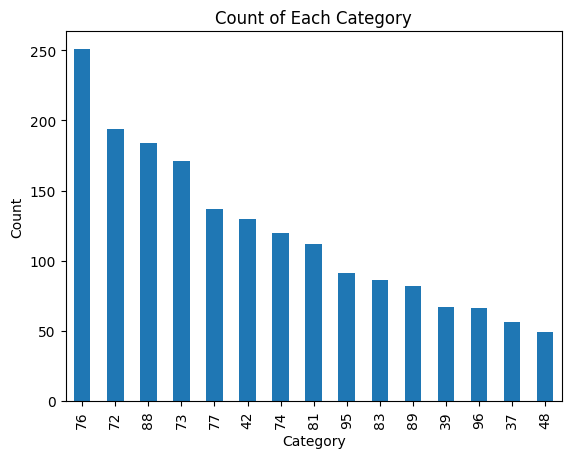

In [12]:
# Đoạn mã để đếm giá trị của cột "Category" và vẽ biểu đồ cột
df_15['Category'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Each Category')
plt.show()

In [ ]:
# # Đoạn mã để đếm giá trị của cột "Category" và vẽ biểu đồ cột
# df['Category'].value_counts().plot(kind='bar')
# plt.xlabel('Category')
# plt.ylabel('Count')
# plt.title('Count of Each Category')
# plt.show()

In [13]:
print(f"Có {df_15['Category'].nunique()} loài hoa")
print("Giá trị lớn nhất của cột 'Category':", df['Category'].value_counts().max())
print("Giá trị nhỏ nhất của cột 'Category':", df['Category'].value_counts().min())

Có 15 loài hoa
Giá trị lớn nhất của cột 'Category': 258
Giá trị nhỏ nhất của cột 'Category': 40


In [ ]:
# print(f"Có {df['Category'].nunique()} loài hoa")
# print("Giá trị lớn nhất của cột 'Category':", df['Category'].value_counts().max())
# print("Giá trị nhỏ nhất của cột 'Category':", df['Category'].value_counts().min())

In [14]:
df_15['Category'].unique()   # giá trị từ 1 đến 101

array(['76', '72', '88', '73', '81', '77', '74', '42', '83', '89', '39',
       '37', '48', '95', '96'], dtype=object)

In [ ]:
# df['Category'].unique()   # giá trị từ 1 đến 101

In [15]:
PATH = os.getcwd() + "/"

Random Sample
['jpg/image_06198.jpg' 'jpg/image_06199.jpg' 'jpg/image_06200.jpg'
 'jpg/image_06201.jpg' 'jpg/image_06202.jpg' 'jpg/image_06203.jpg'
 'jpg/image_06204.jpg' 'jpg/image_06205.jpg' 'jpg/image_06206.jpg']


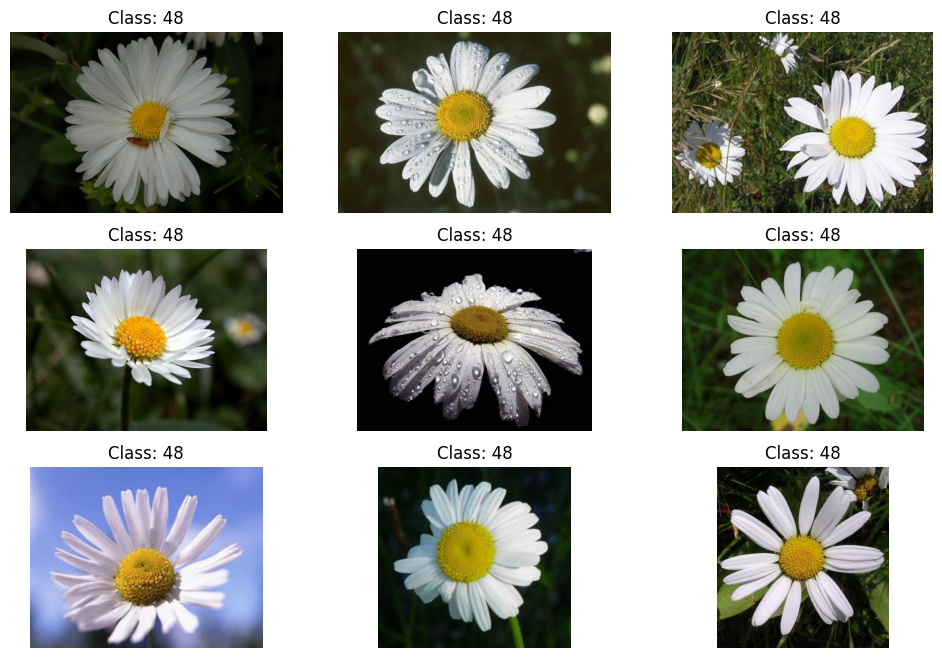

In [37]:
print('Random Sample')
plt.figure(figsize = (12, 8))
# random_image = df_15.sample(n = 9)
random_image = df_15[df_15['Category'] == "48"]
# random_image = df_15.sample(n = 9)
random_image_paths = random_image['Id'].values[0:9]
print(random_image_paths)
random_image_cat = random_image['Category'].values

for index, path in enumerate(random_image_paths):
    im = PIL.Image.open(PATH + path)
    plt.subplot(3, 3, index + 1)
    plt.imshow(im)
    plt.title('Class: ' + str(random_image_cat[index]))
    plt.axis('off')

plt.show()

In [ ]:
# print('Random Sample')
# plt.figure(figsize = (12, 8))
# random_image = df.sample(n = 9)
# random_image_paths = random_image['Id'].values
# random_image_cat = random_image['Category'].values

# for index, path in enumerate(random_image_paths):
#     im = PIL.Image.open(PATH + path)
#     plt.subplot(3, 3, index + 1)
#     plt.imshow(im)
#     plt.title('Class: ' + str(random_image_cat[index]))
#     plt.axis('off')

# plt.show()

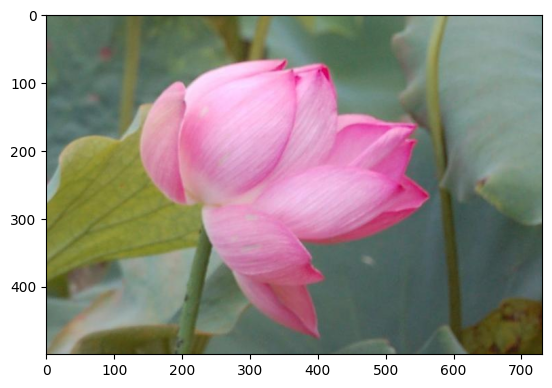

(731, 500)

In [17]:
image = PIL.Image.open(PATH + path)
imgplot = plt.imshow(image)
plt.show()
image.size

### Split Train Test

In [18]:
train_files, test_files, train_labels, test_labels = \
    train_test_split(
        df_15['Id'],
        df_15['Category'],
        test_size = 0.2,
        random_state = 42,
        stratify = df_15['Category']
)
train_files = pd.DataFrame(train_files)
test_files = pd.DataFrame(test_files)
train_files['Category'] = train_labels
test_files['Category'] = test_labels
train_files.shape, test_files.shape

((1436, 2), (360, 2))

In [ ]:
# train_files, test_files, train_labels, test_labels = \
#     train_test_split(
#         df['Id'],
#         df['Category'],
#         test_size = 0.2,
#         random_state = 42,
#         stratify = df['Category']
# )
# train_files = pd.DataFrame(train_files)
# test_files = pd.DataFrame(test_files)
# train_files['Category'] = train_labels
# test_files['Category'] = test_labels
# train_files.shape, test_files.shape

In [19]:
train_files.head(5)

Id Category
270   jpg/image_00271.jpg       72
6223  jpg/image_06224.jpg       48
263   jpg/image_00264.jpg       72
6210  jpg/image_06211.jpg       48
7678  jpg/image_07679.jpg       95

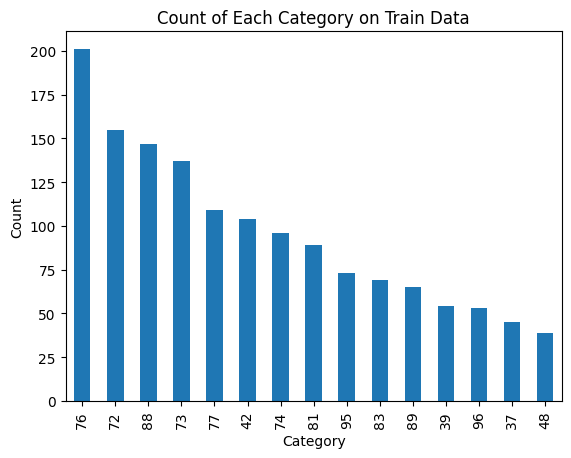

In [20]:
# Đoạn mã để đếm giá trị của cột "Category" và vẽ biểu đồ cột
train_files['Category'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Each Category on Train Data')
plt.show()

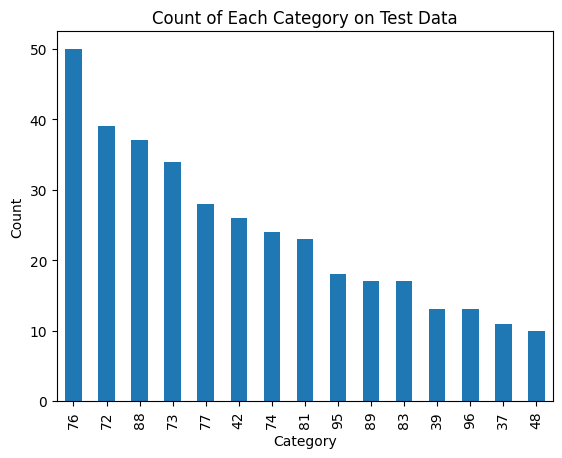

In [21]:
# Đoạn mã để đếm giá trị của cột "Category" và vẽ biểu đồ cột
test_files['Category'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Each Category on Test Data')
plt.show()

### Data augmentation

In [22]:
train_datagen = ImageDataGenerator(
    rescale = 1. / 255,
    rotation_range = 50,
    shear_range = 0.2,
    zoom_range = [0.75, 1.25],
    brightness_range = [0.5, 1.5],
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True
)
test_datagen = ImageDataGenerator(rescale = 1. / 255)

In [23]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe = train_files,
    directory = DATA_PATH,
    x_col = 'Id',
    y_col = 'Category',
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    shuffle = True,
    seed = RANDOM_SEED
)
test_generator = test_datagen.flow_from_dataframe(
    dataframe = test_files,
    directory = DATA_PATH,
    x_col = 'Id',
    y_col = 'Category',
    target_size = (IMG_SIZE, IMG_SIZE),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical',
    shuffle = False,
    seed = RANDOM_SEED
)

Found 1436 validated image filenames belonging to 15 classes.
Found 360 validated image filenames belonging to 15 classes.


In [24]:
print("Danh sách nhãn của train_generator:")
print(train_generator.class_indices)

print("\nDanh sách nhãn của test_generator:")
print(test_generator.class_indices)
g_dict = train_generator.class_indices
classes = list(g_dict.keys())
print(classes)

Danh sách nhãn của train_generator:
{'37': 0, '39': 1, '42': 2, '48': 3, '72': 4, '73': 5, '74': 6, '76': 7, '77': 8, '81': 9, '83': 10, '88': 11, '89': 12, '95': 13, '96': 14}

Danh sách nhãn của test_generator:
{'37': 0, '39': 1, '42': 2, '48': 3, '72': 4, '73': 5, '74': 6, '76': 7, '77': 8, '81': 9, '83': 10, '88': 11, '89': 12, '95': 13, '96': 14}
['37', '39', '42', '48', '72', '73', '74', '76', '77', '81', '83', '88', '89', '95', '96']


In [25]:
train_generator.samples

1436

Ví dụ về hình ảnh từ train_generator


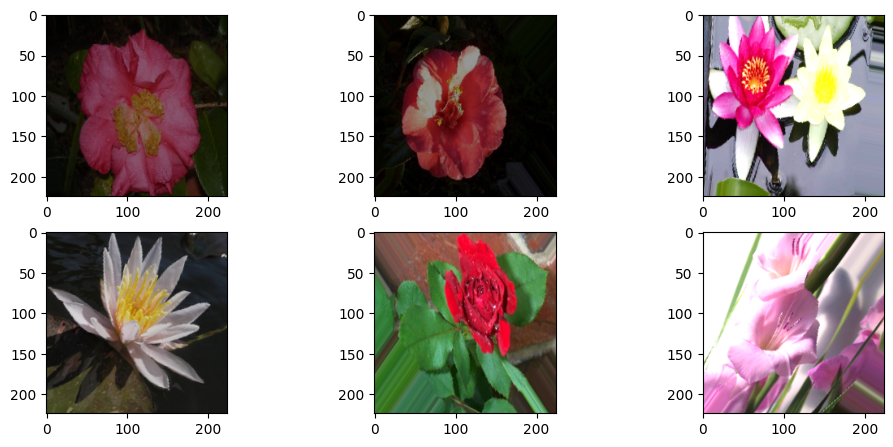

In [26]:
from skimage import io

def imshow(image_RGB):
    io.imshow(image_RGB)
    io.show()

x, y = train_generator.next()
print('Ví dụ về hình ảnh từ train_generator')
plt.figure(figsize = (12, 8))

for i in range(0, 6):
    image = x[i]
    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
#     plt.title('Class: ' + str(y[i]))
#     plt.axis('off')

plt.show()

Ví dụ về hình ảnh từ test_generator


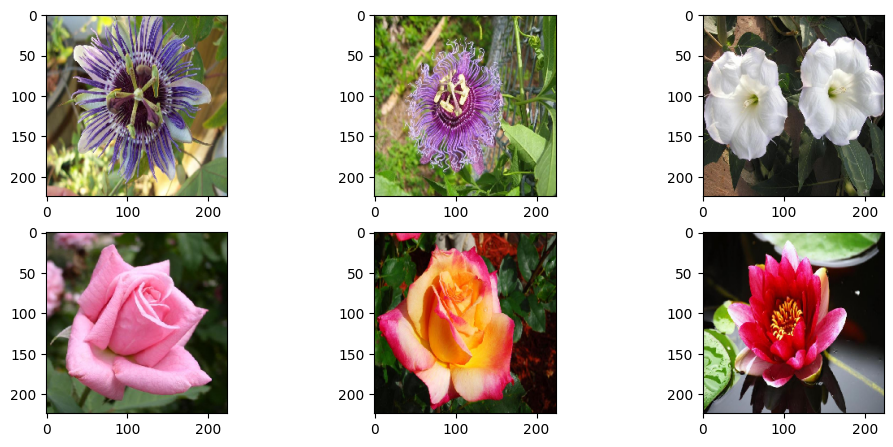

In [27]:
x, y = test_generator.next()
print('Ví dụ về hình ảnh từ test_generator')
plt.figure(figsize = (12, 8))

for i in range(0, 6):
    image = x[i]
    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
#     plt.title('Class: ' + str(y[i]))
#     plt.axis('off')

plt.show()

## My Model

### My model

In [ ]:
# # My model
# model = M.Sequential()
# model.add(L.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
# model.add(L.BatchNormalization())
# model.add(L.Conv2D(32, (3, 3), activation='relu'))
# model.add(L.BatchNormalization())
# model.add(L.MaxPooling2D((2, 2)))
# model.add(L.Dropout(0.25))

# model.add(L.Conv2D(64, (3, 3), activation='relu'))
# model.add(L.BatchNormalization())
# model.add(L.Conv2D(64, (3, 3), activation='relu'))
# model.add(L.BatchNormalization())
# model.add(L.MaxPooling2D((2, 2)))
# model.add(L.Dropout(0.25))

# model.add(L.Conv2D(128, (3, 3), activation='relu'))
# model.add(L.BatchNormalization())
# model.add(L.MaxPooling2D((2, 2)))
# model.add(L.Dropout(0.25))

# model.add(L.Flatten())
# model.add(L.Dense(512, activation='relu'))
# model.add(L.BatchNormalization())
# model.add(L.Dropout(0.5))
# model.add(L.Dense(CLASS_NUM, activation='softmax'))

In [ ]:
model = M.Sequential([
    L.Conv2D(16, (5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape),
    L.MaxPooling2D((2, 2), strides=(2, 2), padding='valid'),
    L.Conv2D(32, (5, 5), strides=(1, 1), padding='same', activation='relu'),
    L.MaxPooling2D((2, 2), strides=(2, 2), padding='valid'),
    L.Conv2D(64, (5, 5), strides=(1, 1), padding='same', activation='relu'),
    L.MaxPooling2D((2, 2), strides=(2, 2), padding='valid'),
    L.Conv2D(128, (5, 5), strides=(1, 1), padding='same', activation='relu'),
    L.MaxPooling2D((2, 2), strides=(2, 2), padding='valid'),
    L.Flatten(),
    L.Dense(1024, activation='relu'),
    L.Dropout(0.2),
    L.Dense(256, activation='relu'),
    L.Dropout(0.2),
    L.Dense(CLASS_NUM, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 250, 250, 16)      1216      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 125, 125, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 32)      12832     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 62, 62, 64)        51264     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 31, 31, 64)       

In [ ]:
# check the trainable status of the individual layers
for layer in model.layers:
    print(layer, layer.trainable)

<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f20a41a8640> True
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f20a41abfa0> True
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f209df7d3f0> True
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f20a41aae60> True
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f20a41a9ed0> True
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f20a41a92d0> True
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f20a41a86d0> True
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f20a42a3850> True
<keras.src.layers.reshaping.flatten.Flatten object at 0x7f20a42a36a0> True
<keras.src.layers.core.dense.Dense object at 0x7f20a42a1c00> True
<keras.src.layers.regularization.dropout.Dropout object at 0x7f20a42a02b0> True
<keras.src.layers.core.dense.Dense object at 0x7f20a42a2170> True
<keras.src.layers.regularization.dropout.Dropout object at 0x7f20a42a

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = optimizers.Adam(learning_rate = LR_step1),
    metrics = ['accuracy']
)

In [ ]:
checkpoint = ModelCheckpoint(
    'best_model_test_5.hdf5',
    monitor = ['val_accuracy'],
    verbose = 1,
    mode = 'max'
)
earlystop = EarlyStopping(
    monitor = 'val_accuracy',
    patience = 10,
    restore_best_weights = True
)
callbacks_list = [checkpoint, earlystop]

In [ ]:
train_generator.samples

1436

### Huấn luyện

In [ ]:
# fit include generator
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.samples // test_generator.batch_size,
    epochs = 20,
    callbacks = callbacks_list
)

Epoch 1/20
179/179 [==============================] - ETA: 0s - loss: 0.6465 - accuracy: 0.7822
Epoch 1: saving model to best_model_test_5.hdf5
179/179 [==============================] - 48s 268ms/step - loss: 0.6465 - accuracy: 0.7822 - val_loss: 0.7145 - val_accuracy: 0.7861
Epoch 2/20
179/179 [==============================] - ETA: 0s - loss: 0.6156 - accuracy: 0.7864
Epoch 2: saving model to best_model_test_5.hdf5
179/179 [==============================] - 42s 235ms/step - loss: 0.6156 - accuracy: 0.7864 - val_loss: 0.8547 - val_accuracy: 0.7389
Epoch 3/20
179/179 [==============================] - ETA: 0s - loss: 0.6498 - accuracy: 0.7850
Epoch 3: saving model to best_model_test_5.hdf5
179/179 [==============================] - 45s 248ms/step - loss: 0.6498 - accuracy: 0.7850 - val_loss: 0.7157 - val_accuracy: 0.7667
Epoch 4/20
179/179 [==============================] - ETA: 0s - loss: 0.6544 - accuracy: 0.7745
Epoch 4: saving model to best_model_test_5.hdf5
179/179 [=============

In [ ]:
# model.save('./SaveModel/my_model_new_step1.hdf5')
model.load_weights('./SaveModel/my_model_2_s128_step1.hdf5')

ValueError: Cannot assign value to variable ' dense_3/kernel:0': Shape mismatch.The variable shape (28800, 1024), and the assigned value shape (8192, 1024) are incompatible.

In [ ]:
# scores = model.evaluate_generator(test_generator, verbose = 1)
scores = model.evaluate(test_generator, verbose=1)
print('Accuracy: %.2f%%' % (scores[1] * 100))

45/45 [==============================] - 3s 66ms/step - loss: 0.6839 - accuracy: 0.7917
Accuracy: 79.17%


In [ ]:
def plot_history(history):
    plt.figure(figsize = (10, 5))
#     plt.style.use('dark_background')
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'b', label = 'Training acc')
    plt.plot(epochs, val_acc, 'g', label = 'Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
#     plt.figure()
    plt.figure(figsize = (10, 5))
#     plt.style.use('dark_background')
    plt.plot(epochs, loss, 'b', label = 'Training loss')
    plt.plot(epochs, val_loss, 'g', label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

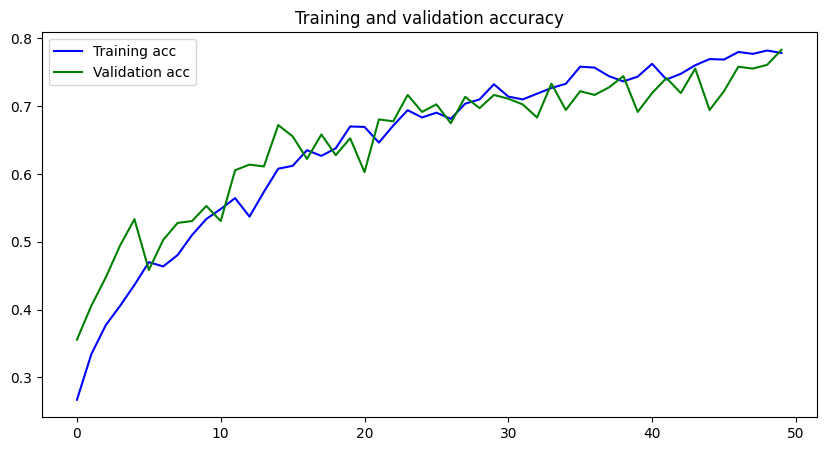

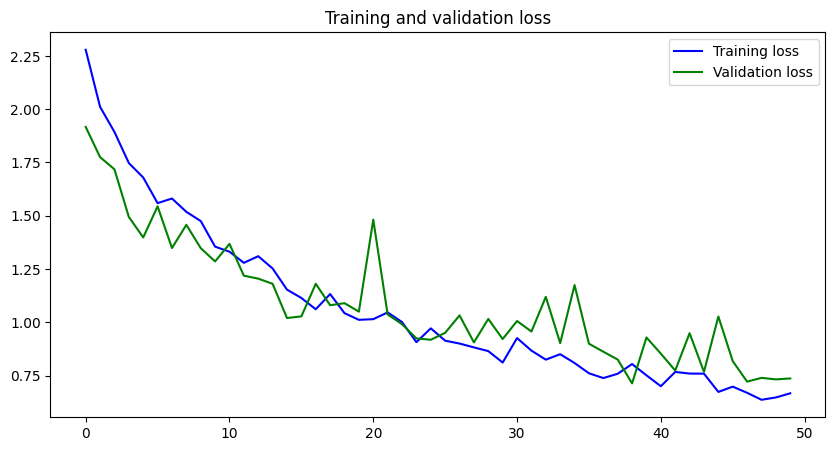

In [ ]:
plot_history(history)

## Model Lenet5

### Lenet5

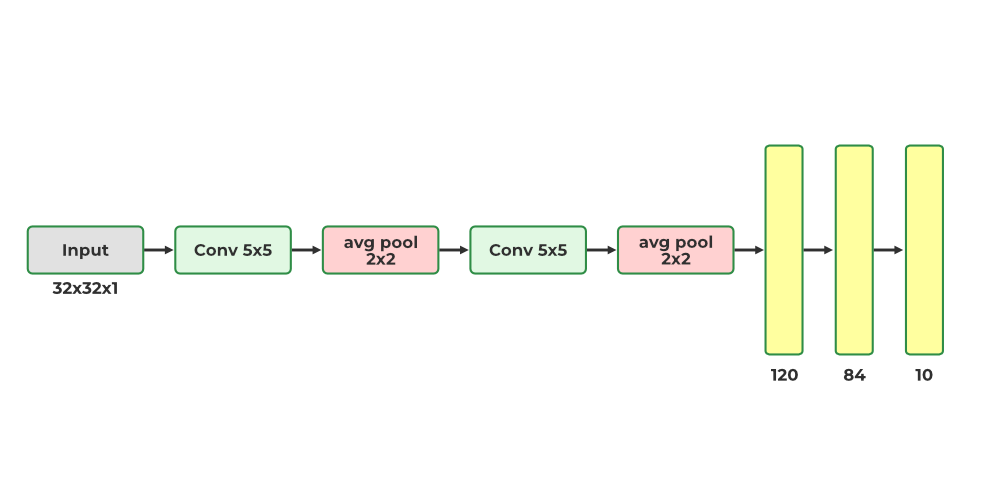

In [ ]:
lenet5_model = M.Sequential()
lenet5_model.add(L.Conv2D(16, (5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
# L.Conv2D(32, (5, 5), strides=(1, 1), padding='same', activation='relu')
lenet5_model.add(L.AveragePooling2D(2))
lenet5_model.add(L.Conv2D(32, (5, 5), strides=(1, 1), padding='same', activation='relu'))
lenet5_model.add(L.AveragePooling2D(2))
lenet5_model.add(L.Conv2D(64, (5, 5), strides=(1, 1), padding='same', activation='relu'))
lenet5_model.add(L.AveragePooling2D(2))
lenet5_model.add(L.Conv2D(128, (5, 5), strides=(1, 1), padding='same', activation='relu'))
lenet5_model.add(L.AveragePooling2D(2))
lenet5_model.add(L.Flatten())
lenet5_model.add(L.Dense(1024, activation='relu'))
lenet5_model.add(L.Dense(768, activation='relu'))
# lenet5_model.add(L.Dense(10, activation='softmax'))

In [ ]:
# old
# lenet5_model = M.Sequential()
# lenet5_model.add(L.Conv2D(16, (5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
# L.Conv2D(32, (5, 5), strides=(1, 1), padding='same', activation='relu')
# lenet5_model.add(L.AveragePooling2D(2))
# lenet5_model.add(L.Conv2D(16, 5, activation='tanh'))
# lenet5_model.add(L.AveragePooling2D(2))
# lenet5_model.add(L.Activation('sigmoid'))
# lenet5_model.add(L.Conv2D(6, 5, activation='tanh'))
# lenet5_model.add(L.Flatten())
# lenet5_model.add(L.Dense(2048, activation='tanh'))
# # lenet5_model.add(L.Dense(10, activation='softmax'))

In [ ]:
# Print model summary
lenet5_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 250, 250, 16)      1216      
                                                                 
 average_pooling2d_5 (Avera  (None, 125, 125, 16)      0         
 gePooling2D)                                                    
                                                                 
 conv2d_20 (Conv2D)          (None, 125, 125, 32)      12832     
                                                                 
 average_pooling2d_6 (Avera  (None, 62, 62, 32)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_21 (Conv2D)          (None, 62, 62, 64)        51264     
                                                                 
 average_pooling2d_7 (Avera  (None, 31, 31, 64)       

In [ ]:
model = M.Sequential()
model.add(lenet5_model)
# model.add(L.GlobalAveragePooling2D())
model.add(L.Dense(CLASS_NUM, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 768)               30549664  
                                                                 
 dense_14 (Dense)            (None, 15)                11535     
                                                                 
Total params: 30561199 (116.58 MB)
Trainable params: 30561199 (116.58 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
print(len(model.layers))
print(len(model.trainable_variables))

2
14


In [ ]:
# check the trainable status of the individual layers
for layer in model.layers:
    print(layer, layer.trainable)

<keras.src.engine.sequential.Sequential object at 0x7aab925af2e0> True
<keras.src.layers.core.dense.Dense object at 0x7aab8ec446d0> True


In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = optimizers.Adam(learning_rate = LR_step1),
    metrics = ['accuracy']
)

earlystop:
- monitor - giám sát trên thang đo val_acc
- patience - số lượng epochs không cải thiện độ chính xác sẽ dừng
- restore_best_weights - quay lại trọng số cho độ chính xác tốt nhất

In [ ]:
checkpoint = ModelCheckpoint(
    'best_model_test.hdf5',
    monitor = ['val_accuracy'],
    verbose = 1,
    mode = 'max'
)
earlystop = EarlyStopping(
    monitor = 'val_accuracy',
    patience = 10,
    restore_best_weights = True
)
callbacks_list = [checkpoint, earlystop]

In [ ]:
# scores = model.evaluate(test_generator, verbose=1)
# print('Accuracy: %.2f%%' % (scores[1] * 100))

### Huấn luyện

đã huấn luyện được 12 epoch

In [ ]:
# fit include generator
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.samples // test_generator.batch_size,
    epochs = 20,
    callbacks = callbacks_list
)

Epoch 1/20
179/179 [==============================] - ETA: 0s - loss: 0.7202 - accuracy: 0.7570
Epoch 1: saving model to best_model_test.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


179/179 [==============================] - 54s 299ms/step - loss: 0.7202 - accuracy: 0.7570 - val_loss: 1.0345 - val_accuracy: 0.6444
Epoch 2/20
179/179 [==============================] - ETA: 0s - loss: 0.7447 - accuracy: 0.7521
Epoch 2: saving model to best_model_test.hdf5
179/179 [==============================] - 46s 258ms/step - loss: 0.7447 - accuracy: 0.7521 - val_loss: 0.8832 - val_accuracy: 0.6833
Epoch 3/20
179/179 [==============================] - ETA: 0s - loss: 0.6873 - accuracy: 0.7738
Epoch 3: saving model to best_model_test.hdf5
179/179 [==============================] - 45s 251ms/step - loss: 0.6873 - accuracy: 0.7738 - val_loss: 0.8754 - val_accuracy: 0.7306
Epoch 4/20
179/179 [==============================] - ETA: 0s - loss: 0.6574 - accuracy: 0.7633
Epoch 4: saving model to best_model_test.hdf5
179/179 [==============================] - 46s 259ms/step - loss: 0.6574 - accuracy: 0.7633 - val_loss: 0.7830 - val_accuracy: 0.7194
Epoch 5/20
179/179 [==================

In [ ]:
model.save('./SaveModel/model_lenet5_step1.hdf5')
# model.load_weights('best_model_test.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# scores = model.evaluate_generator(test_generator, verbose = 1)
scores = model.evaluate(test_generator, verbose=1)
print('Accuracy: %.2f%%' % (scores[1] * 100))

45/45 [==============================] - 3s 63ms/step - loss: 3.2911 - accuracy: 0.1389
Accuracy: 13.89%


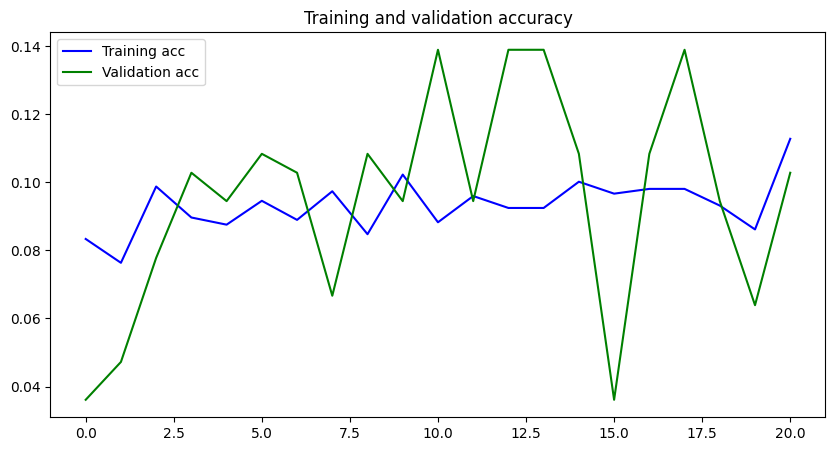

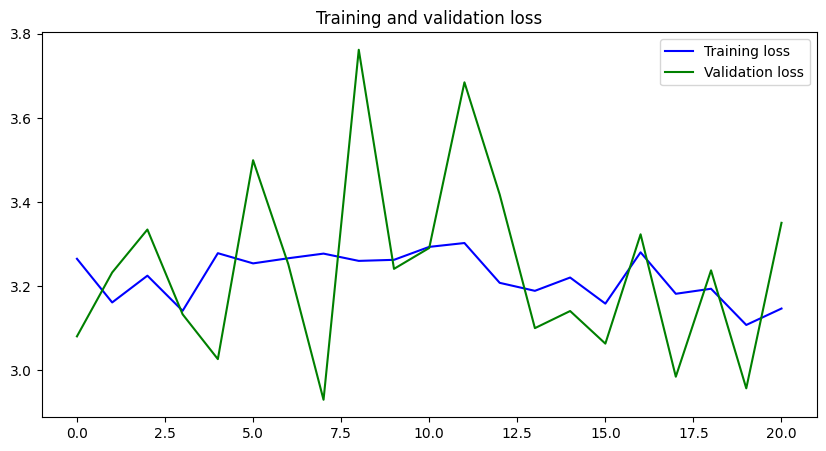

In [ ]:
plot_history(history)

## Model AlexNet

### AlexNet

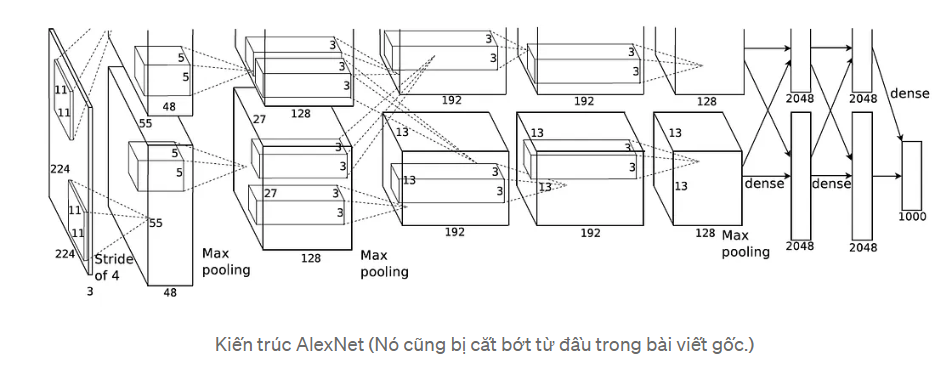

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout


model=Sequential()

#1 conv layer
model.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),padding="valid",activation="relu",input_shape=(224,224,3)))

#1 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#2 conv layer
model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding="valid",activation="relu"))

#2 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())

#3 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#4 conv layer
model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#5 conv layer
model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))

#3 max pool layer
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))

model.add(BatchNormalization())


model.add(Flatten())

#1 dense layer
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#2 dense layer
model.add(Dense(4096,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#3 dense layer
model.add(Dense(1000,activation="relu"))

model.add(Dropout(0.4))

model.add(BatchNormalization())

#output layer
model.add(Dense(CLASS_NUM,activation="softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 26, 26, 96)        0         
 g2D)                                                            
                                                                 
 batch_normalization_12 (Ba  (None, 26, 26, 96)        384       
 tchNormalization)                                               
                                                                 
 conv2d_11 (Conv2D)          (None, 22, 22, 256)       614656    
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 10, 10, 256)       0         
 g2D)                                                            
                                                      

### Hidden

In [ ]:
# L.Conv2D(384, (3, 3), strides=(1, 1), padding='same', activation='relu')
# # old
# model_alexnet = M.Sequential()
# model_alexnet.add(L.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=input_shape))
# model_alexnet.add(L.Conv2D(96, (11, 11), strides=(4, 4), padding='same', activation='relu'))
# model_alexnet.add(L.MaxPooling2D(3, strides=2))
# model_alexnet.add(L.Conv2D(256, (5, 5), strides=(3, 3), padding='same', activation='relu'))
# model_alexnet.add(L.MaxPooling2D(3, strides=2))
# model_alexnet.add(L.Conv2D(384, (3, 3), strides=(2, 2), padding='same', activation='relu'))
# model_alexnet.add(L.Conv2D(384, (3, 3), strides=(2, 2), padding='same', activation='relu'))
# model_alexnet.add(L.Conv2D(256, (3, 3), strides=(2, 2), padding='same', activation='relu'))
# model_alexnet.add(L.Flatten())
# model_alexnet.add(L.Dense(4096, activation='relu'))
# model_alexnet.add(L.Dropout(0.5))
# model_alexnet.add(L.Dense(4096, activation='relu'))
# # model_alexnet.add(L.Dense(10, activation='softmax'))
# model_alexnet.summary()

In [ ]:
# # old
# model_alexnet = M.Sequential()
# model_alexnet.add(L.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=input_shape))
# model_alexnet.add(L.Conv2D(96, 11, strides=4, padding='same'))
# model_alexnet.add(L.Lambda(tf.nn.local_response_normalization))
# model_alexnet.add(L.Activation('relu'))
# model_alexnet.add(L.MaxPooling2D(3, strides=2))
# model_alexnet.add(L.Conv2D(256, 5, strides=4, padding='same'))
# model_alexnet.add(L.Lambda(tf.nn.local_response_normalization))
# model_alexnet.add(L.Activation('relu'))
# model_alexnet.add(L.MaxPooling2D(3, strides=2))
# model_alexnet.add(L.Conv2D(384, 3, strides=2, padding='same'))
# model_alexnet.add(L.Activation('relu'))
# model_alexnet.add(L.Conv2D(384, 3, strides=2, padding='same'))
# model_alexnet.add(L.Activation('relu'))
# model_alexnet.add(L.Conv2D(256, 3, strides=2, padding='same'))
# model_alexnet.add(L.Activation('relu'))
# model_alexnet.add(L.Flatten())
# model_alexnet.add(L.Dense(4096, activation='relu'))
# model_alexnet.add(L.Dropout(0.5))
# model_alexnet.add(L.Dense(4096, activation='relu'))
# # model_alexnet.add(L.Dense(10, activation='softmax'))
# model_alexnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 56, 56, 96)        34944     
                                                                 
 lambda (Lambda)             (None, 56, 56, 96)        0         
                                                                 
 activation (Activation)     (None, 56, 56, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 256)         614656    
                                                        

In [ ]:
# model = M.Sequential()
# model.add(model_alexnet)
# # model.add(L.GlobalAveragePooling2D())
# model.add(L.Dense(CLASS_NUM, activation = 'softmax'))

In [ ]:
model.summary()

In [ ]:
print(len(model.layers))
print(len(model.trainable_variables))

22
30


In [ ]:
# check the trainable status of the individual layers
for layer in model.layers:
    print(layer, layer.trainable)

<keras.src.layers.convolutional.conv2d.Conv2D object at 0x788c9c11b880> True
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x788bfc79fa30> True
<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x788bf8db38e0> True
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x788bf8d908b0> True
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x788bf8d90850> True
<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x788bfc76e7a0> True
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x788bfc95bd00> True
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x788bfc959d50> True
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x788bfc959c00> True
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x788bfd1d80d0> True
<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x788bfc95a830> True
<keras.src.layers.reshaping.flatten.Flatten object at 0x7

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = optimizers.Adam(learning_rate = LR_step1),
    metrics = ['accuracy']
)

### Huấn luyện

In [ ]:
checkpoint = ModelCheckpoint(
    'best_alexnet_test.hdf5',
    monitor = ['val_accuracy'],
    verbose = 1,
    mode = 'max'
)
earlystop = EarlyStopping(
    monitor = 'val_accuracy',
    patience = 10,
    restore_best_weights = True
)
callbacks_list = [checkpoint, earlystop]

In [ ]:
# fit include generator
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.samples // test_generator.batch_size,
    epochs = 50,
    callbacks = callbacks_list
)

Epoch 1/50
179/179 [==============================] - ETA: 0s - loss: 2.4844 - accuracy: 0.2087
Epoch 1: saving model to best_alexnet_test.hdf5
179/179 [==============================] - 32s 178ms/step - loss: 2.4844 - accuracy: 0.2087 - val_loss: 3.9386 - val_accuracy: 0.2750
Epoch 2/50
179/179 [==============================] - ETA: 0s - loss: 2.5171 - accuracy: 0.1982
Epoch 2: saving model to best_alexnet_test.hdf5
179/179 [==============================] - 36s 203ms/step - loss: 2.5171 - accuracy: 0.1982 - val_loss: 3.3423 - val_accuracy: 0.2639
Epoch 3/50
179/179 [==============================] - ETA: 0s - loss: 2.4299 - accuracy: 0.2101
Epoch 3: saving model to best_alexnet_test.hdf5
179/179 [==============================] - 36s 201ms/step - loss: 2.4299 - accuracy: 0.2101 - val_loss: 2.8221 - val_accuracy: 0.2806
Epoch 4/50
179/179 [==============================] - ETA: 0s - loss: 2.4130 - accuracy: 0.2150
Epoch 4: saving model to best_alexnet_test.hdf5
179/179 [=============

In [ ]:
# model.save('./SaveModel/model_alexnet_step1.hdf5')
model.load_weights('./SaveModel/model_alexnet_step1.hdf5')

## Cur

In [ ]:
# scores = model.evaluate_generator(test_generator, verbose = 1)
scores = model.evaluate(test_generator, verbose=1)
print('Accuracy: %.2f%%' % (scores[1] * 100))

25/45 [===============>..............] - ETA: 0s - loss: 2.7484 - accuracy: 0.3050

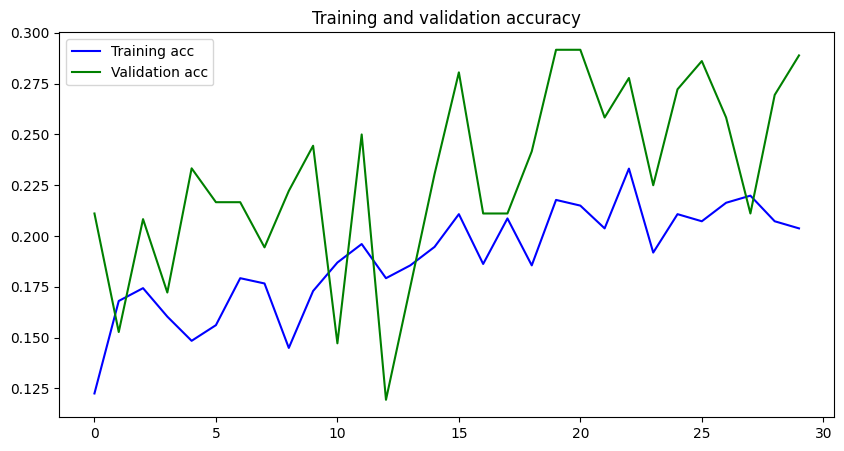

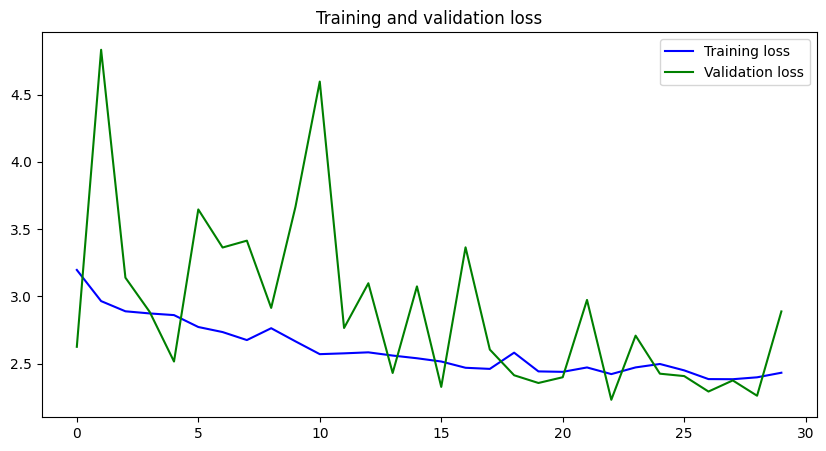

In [ ]:
plot_history(history)

## Model Google Net

### Google Net

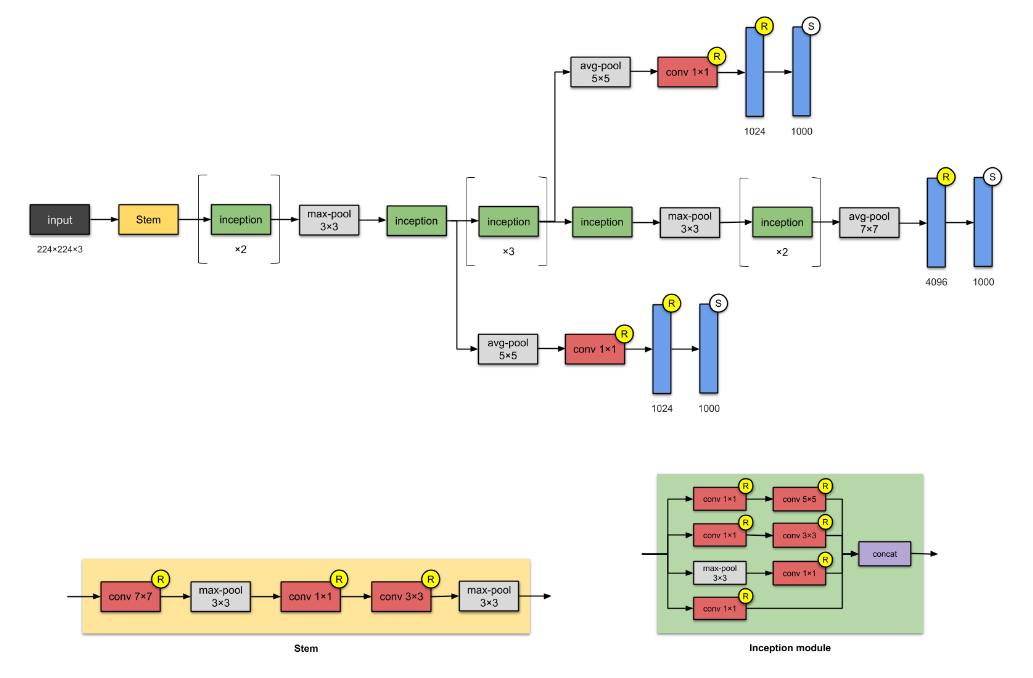

In [ ]:
# Imports
# from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Concatenate, \
#     AvgPool2D, Dropout, Flatten, Dense
from tensorflow.keras import Model

# Stem block
def stem_block(input) :
    sb = L.Conv2D(filters=64, kernel_size=7, strides=2, padding='same',
                activation='relu')(input)
    sb = L.MaxPool2D(pool_size=3, strides=2, padding='same')(sb)
    sb = L.Conv2D(filters=64, kernel_size=1, activation='relu')(sb)
    sb = L.Conv2D(filters=192, kernel_size=3, padding='same',
                activation='relu')(sb)
    sb = L.MaxPool2D(pool_size=3, strides=2, padding='same')(sb)
    return sb

# Inception block
# You can build a simple model to visualize the result of this function
# to test the Inception block.
def inception_block(x, filters):

    c1 = L.Conv2D(filters=filters[0], kernel_size=1, padding='same', use_bias=False)(x)
    c1 = L.BatchNormalization(epsilon=0.001)(c1)
    c1 = L.Activation("relu")(c1)

    c2 = L.Conv2D(filters=filters[1], kernel_size=1, padding='same', use_bias=False)(x)
    c2 = L.BatchNormalization(epsilon=0.001)(c2)
    c2 = L.Activation("relu")(c2)
    c2 = L.Conv2D(filters=filters[2], kernel_size=3, padding='same', use_bias=False)(c2)
    c2 = L.BatchNormalization(epsilon=0.001)(c2)
    c2 = L.Activation("relu")(c2)

    # c2 = L.Conv2D(filters=filters[1], kernel_size=1, padding='same', use_bias=False)(x)
    # c2 = L.BatchNormalization(epsilon=0.001)(c2)
    # c2 = L.Activation("relu")(c2)
    # c2 = L.Conv2D(filters=filters[2], kernel_size=3, padding='same', use_bias=False)(c2)

    # c3 = L.Conv2D(filters=filters[3], kernel_size=1, activation='relu')(x)
    c3 = L.Conv2D(filters=filters[3], kernel_size=1, padding='same', use_bias=False)(x)
    c3 = L.BatchNormalization(epsilon=0.001)(c3)
    c3 = L.Activation("relu")(c3)
    # c3 = L.Conv2D(filters=filters[4], kernel_size=5, padding='same', activation='relu')(c3)
    c3 = L.Conv2D(filters=filters[4], kernel_size=5, padding='same', use_bias=False)(c3)
    c3 = L.BatchNormalization(epsilon=0.001)(c3)
    c3 = L.Activation("relu")(c3)

    mp = L.MaxPool2D(pool_size=3, strides=1, padding='same')(x)
    # c4 = L.Conv2D(filters=filters[5], kernel_size=1, activation='relu')(mp)
    c4 = L.Conv2D(filters=filters[5], kernel_size=1, padding='same', use_bias=False)(mp)
    c4 = L.BatchNormalization(epsilon=0.001)(c4)
    c4 = L.Activation("relu")(c4)

    output = L.Concatenate()([c1, c2, c3, c4])
    return output

# Input
input = L.Input(shape=input_shape)  #(224, 224, 3)

# Blocks
my_model = stem_block(input)

my_model = inception_block(my_model, filters=[64, 96, 128, 16, 32, 32])
my_model = inception_block(my_model, filters=[128, 128, 192, 32, 96, 64])
my_model = L.MaxPool2D(pool_size=3, strides=2, padding='same')(my_model)

my_model = inception_block(my_model, filters=[192, 96, 208, 16, 48, 64])
my_model = inception_block(my_model, filters=[160, 112, 224, 24, 64, 64])
my_model = inception_block(my_model, filters=[128, 128, 256, 24, 64, 64])
my_model = inception_block(my_model, filters=[112, 144, 288, 32, 64, 64])
my_model = inception_block(my_model, filters=[256, 160, 320, 32, 128, 128])
my_model = L.MaxPool2D(pool_size=3, strides=2, padding='same')(my_model)

my_model = inception_block(my_model, filters=[256, 160, 320, 32, 128, 128])
my_model = inception_block(my_model, filters=[384, 192, 384, 48, 128, 128])
my_model = L.AvgPool2D(pool_size=7, strides=1)(my_model)
my_model = L.Dropout(rate=0.4)(my_model)

# Dense layers
my_model = L.Flatten()(my_model)
my_model = L.Dense(units=256, activation='relu')(my_model)
my_model = L.Dropout(0.1)(my_model)
# Output layer
output = L.Dense(units=CLASS_NUM, activation='softmax')(my_model)

# Model
GoogLeNet_model = Model(inputs=input, outputs=output)

In [ ]:
print(GoogLeNet_model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 112, 112, 64)         9472      ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 56, 56, 64)           0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv2d_1 (Conv2D)           (None, 56, 56, 64)           4160      ['max_pooling2d[0][0]']   

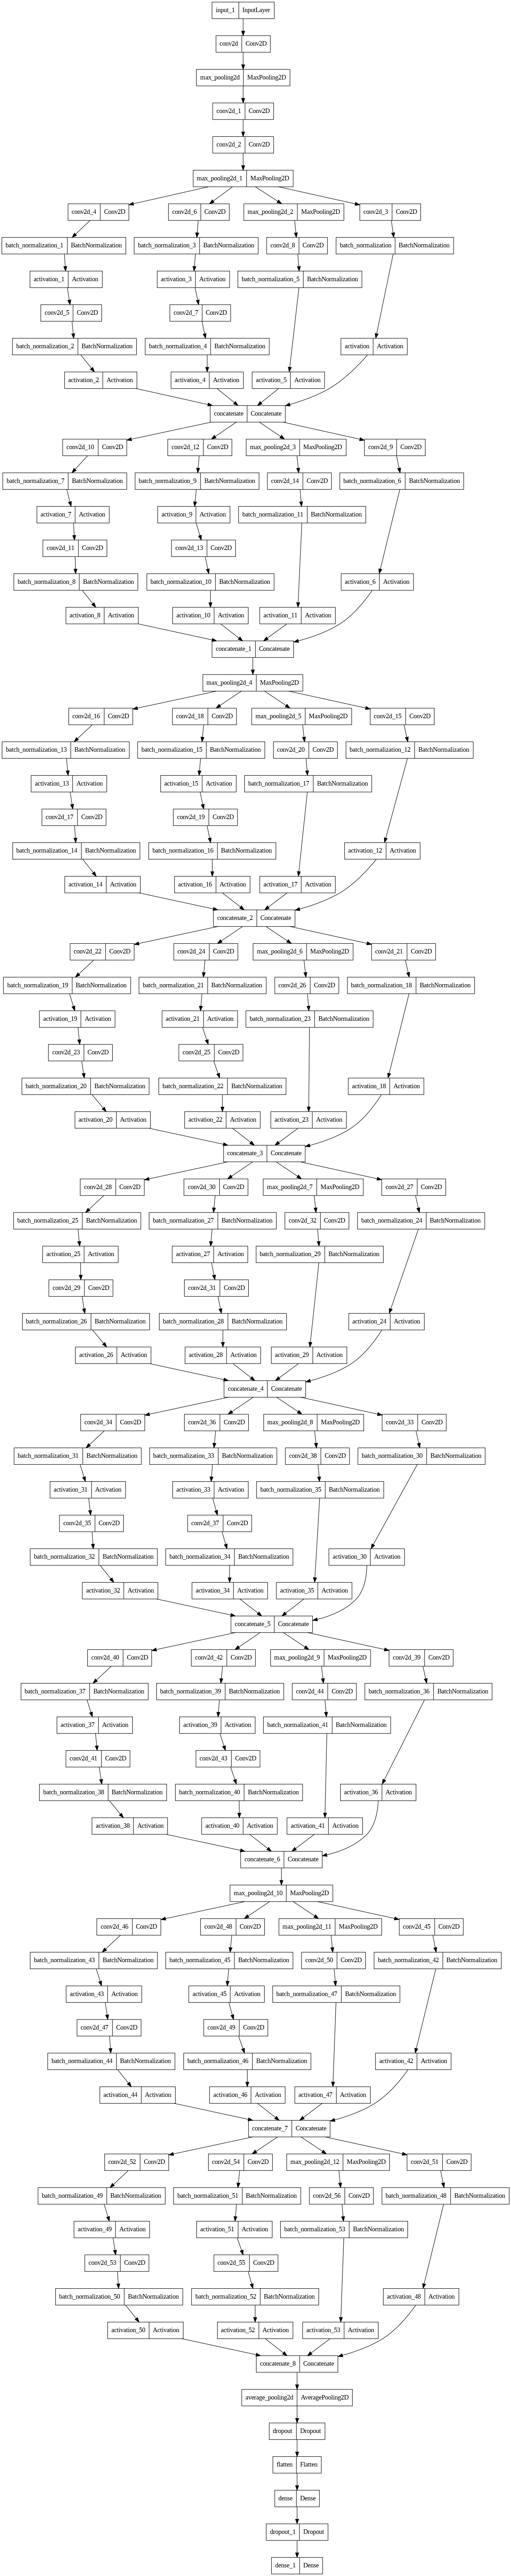

In [ ]:
plot_model(GoogLeNet_model)

### Huấn luyện

In [ ]:
print(len(GoogLeNet_model.layers))
print(len(GoogLeNet_model.trainable_variables))

194
172


In [ ]:
# check the trainable status of the individual layers
for layer in GoogLeNet_model.layers:
    print(layer, layer.trainable)

<keras.src.engine.input_layer.InputLayer object at 0x7f3866e08f10> True
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f3866e090c0> True
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f3866d98e50> True
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f3866d98be0> True
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f3866d98eb0> True
<keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x7f3866d99cc0> True
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f3866d98790> True
<keras.src.layers.convolutional.conv2d.Conv2D object at 0x7f3864290be0> True
<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7f3866d99420> True
<keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7f38642931c0> True
<keras.src.layers.core.activation.Activation object at 0x7f3864291180> True
<keras.src.layers.core.activation.Activation object at 0x7f38642c12d0> True
<keras.src.layers.p

In [ ]:
GoogLeNet_model.compile(
    loss = 'categorical_crossentropy',
    optimizer = optimizers.Adam(learning_rate = LR_step1),
    metrics = ['accuracy']
)

In [ ]:
checkpoint = ModelCheckpoint(
    './ManhModel/final_best_gglenet_model-{epoch:03d}.h5',
    monitor = ['val_accuracy'],
    verbose = 1,
    mode = 'max'
)
earlystop = EarlyStopping(
    monitor = 'val_accuracy',
    patience = 10,
    restore_best_weights = True
)
callbacks_list = [checkpoint, earlystop]

In [ ]:
# fit include generator
history = GoogLeNet_model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.samples // test_generator.batch_size,
    epochs = 50,
    callbacks = callbacks_list
)

Epoch 1/50
179/179 [==============================] - ETA: 0s - loss: 2.6120 - accuracy: 0.1842
Epoch 1: saving model to ./ManhModel/final_best_gglenet_test-001.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


179/179 [==============================] - 789s 4s/step - loss: 2.6120 - accuracy: 0.1842 - val_loss: 4.7164 - val_accuracy: 0.1500
Epoch 2/50
179/179 [==============================] - ETA: 0s - loss: 2.3756 - accuracy: 0.2318
Epoch 2: saving model to ./ManhModel/final_best_gglenet_test-002.h5
179/179 [==============================] - 34s 191ms/step - loss: 2.3756 - accuracy: 0.2318 - val_loss: 2.3175 - val_accuracy: 0.2667
Epoch 3/50
179/179 [==============================] - ETA: 0s - loss: 2.1398 - accuracy: 0.3074
Epoch 3: saving model to ./ManhModel/final_best_gglenet_test-003.h5
179/179 [==============================] - 33s 186ms/step - loss: 2.1398 - accuracy: 0.3074 - val_loss: 2.8429 - val_accuracy: 0.2583
Epoch 4/50
179/179 [==============================] - ETA: 0s - loss: 2.0632 - accuracy: 0.3487
Epoch 4: saving model to ./ManhModel/final_best_gglenet_test-004.h5
179/179 [==============================] - 35s 198ms/step - loss: 2.0632 - accuracy: 0.3487 - val_loss: 2.65

## this

In [ ]:
# GoogLeNet_model.save('./SaveModel/model_ggnet_step1.hdf5')
GoogLeNet_model.load_weights('./SaveModel/model_ggnet_step1.hdf5')
GoogLeNet_model.save('./ManhModel/final_best_gglenet_model.h5')



In [28]:
from keras.models import load_model
loaded_model = load_model('./ManhModel/final_best_gglenet_model.h5') # lưu toàn bộ , cả kiến trúc và trọng số
# GoogLeNet_model.load_weights('./best_gglenet_test.hdf5')

In [29]:
# scores = model.evaluate_generator(test_generator, verbose = 1)
scores = loaded_model.evaluate(test_generator, verbose=1)
print('Accuracy: %.2f%%' % (scores[1] * 100))

45/45 [==============================] - 95s 2s/step - loss: 0.3371 - accuracy: 0.8889
Accuracy: 88.89%


In [40]:
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Thay đổi kích thước ảnh thành kích thước mà mô hình yêu cầu
    img = img / 255.0  # Chuẩn hóa pixel thành khoảng [0, 1]
    return img

import cv2
import matplotlib.pyplot as plt
import PIL.Image

print('Random Sample')
plt.figure(figsize=(12, 8))

# Suppose df_15 contains your data
random_image = df_15[df_15['Category'] == "48"]
random_image_paths = random_image['Id'].values[0:9]
random_image_cat = random_image['Category'].values

for index, path in enumerate(random_image_paths):
    # Read the image using cv2
    img = cv2.imread(PATH + path)
    # Convert the image from BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.subplot(3, 3, index + 1)
    plt.imshow(img)
    plt.title('Class: ' + str(random_image_cat[index]))
    plt.axis('off')

plt.show()


Random Sample


error: OpenCV(4.8.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - cvtColor() missing required argument 'code' (pos 2)
>  - cvtColor() missing required argument 'code' (pos 2)


<Figure size 1200x800 with 0 Axes>

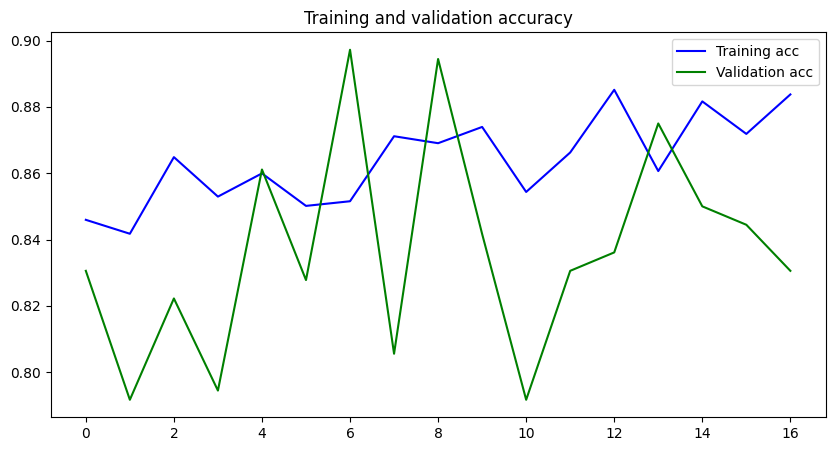

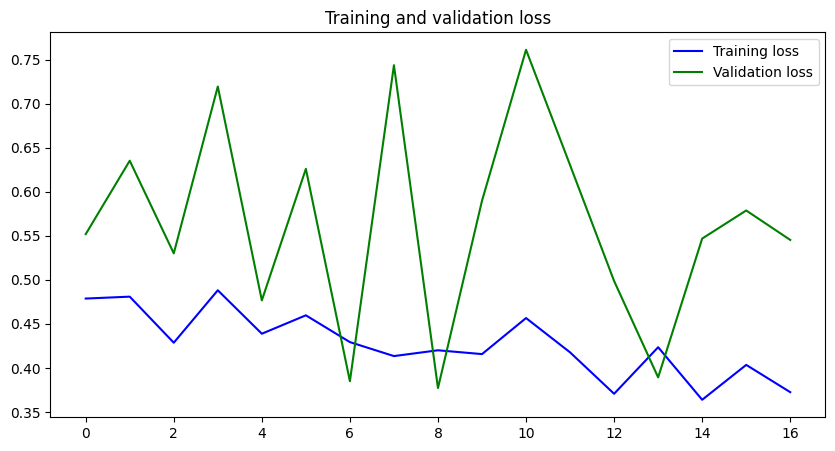

In [ ]:
plot_history(history)

## Model Transfer Learning EfficientNetB6

In [ ]:
input_shape

(250, 250, 3)

In [ ]:
base_model = efn.EfficientNetB6(
    weights = 'imagenet',
    include_top = False,
    input_shape = input_shape
)

NameError: name 'efn' is not defined

In [ ]:
base_model.summary()

Model: "efficientnet-b6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 250, 250, 3)]        0         []                            
                                                                                                  
 stem_conv (Conv2D)          (None, 125, 125, 56)         1512      ['input_6[0][0]']             
                                                                                                  
 stem_bn (BatchNormalizatio  (None, 125, 125, 56)         224       ['stem_conv[0][0]']           
 n)                                                                                               
                                                                                                  
 stem_activation (Activatio  (None, 125, 125, 56)         0         ['stem_bn[0][0]'

In [ ]:
base_model.trainable = False

In [ ]:
model = M.Sequential()
model.add(base_model)
model.add(L.GlobalAveragePooling2D())
model.add(L.Dense(CLASS_NUM, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b6 (Functiona  (None, 8, 8, 2304)        40960136  
 l)                                                              
                                                                 
 global_average_pooling2d (  (None, 2304)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense_25 (Dense)            (None, 15)                34575     
                                                                 
Total params: 40994711 (156.38 MB)
Trainable params: 34575 (135.06 KB)
Non-trainable params: 40960136 (156.25 MB)
_________________________________________________________________


In [ ]:
print(len(model.layers))

3


In [ ]:
len(model.trainable_variables)

2

In [ ]:
# check the trainable status of the individual layers
for layer in model.layers:
    print(layer, layer.trainable)

<keras.src.engine.functional.Functional object at 0x7a9474a101f0> False
<keras.src.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7a9474a13400> True
<keras.src.layers.core.dense.Dense object at 0x7a9474a138b0> True


### Step 1: Freeze Base Layer + Training new Head Classifier

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = optimizers.Adam(learning_rate = LR_step1),
    metrics = ['accuracy']
)

In [ ]:
checkpoint = ModelCheckpoint(
    'best_model.hdf5',
    monitor = ['val_accuracy'],
    verbose = 1,
    mode = 'max'
)
earlystop = EarlyStopping(
    monitor = 'val_accuracy',
    patience = 5,
    restore_best_weights = True
)
callbacks_list = [checkpoint, earlystop]

Đánh giá trước khi huấn luyện

In [ ]:
# scores = model.evaluate_generator(test_generator, verbose = 1)
scores = model.evaluate(test_generator, verbose=1)
print('Accuracy: %.2f%%' % (scores[1] * 100))

205/205 [==============================] - 456s 2s/step - loss: 4.6681 - accuracy: 0.0055
Accuracy: 0.55%


In [ ]:
print(train_generator.samples)

407


In [ ]:
# fit include generator
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.samples // test_generator.batch_size,
    epochs = 5,
    callbacks = callbacks_list
)

Epoch 1/5
179/179 [==============================] - ETA: 0s - loss: 1.7193 - accuracy: 0.5280
Epoch 1: saving model to best_model.hdf5
179/179 [==============================] - 74s 308ms/step - loss: 1.7193 - accuracy: 0.5280 - val_loss: 0.9641 - val_accuracy: 0.7889
Epoch 2/5
179/179 [==============================] - ETA: 0s - loss: 1.0645 - accuracy: 0.6975
Epoch 2: saving model to best_model.hdf5
179/179 [==============================] - 50s 279ms/step - loss: 1.0645 - accuracy: 0.6975 - val_loss: 0.6742 - val_accuracy: 0.8333
Epoch 3/5
179/179 [==============================] - ETA: 0s - loss: 0.8185 - accuracy: 0.7808
Epoch 3: saving model to best_model.hdf5
179/179 [==============================] - 59s 330ms/step - loss: 0.8185 - accuracy: 0.7808 - val_loss: 0.5894 - val_accuracy: 0.8306
Epoch 4/5
179/179 [==============================] - ETA: 0s - loss: 0.6883 - accuracy: 0.8046
Epoch 4: saving model to best_model.hdf5
179/179 [==============================] - 55s 309ms/s

In [ ]:
model.save('./SaveModel/model_step1.hdf5')
model.load_weights('best_model.hdf5')

Đánh giá sau khi huấn luyện

In [ ]:
# scores = model.evaluate_generator(test_generator, verbose = 1)
scores = model.evaluate(test_generator, verbose=1)
print('Accuracy: %.2f%%' % (scores[1] * 100))

45/45 [==============================] - 5s 97ms/step - loss: 0.4393 - accuracy: 0.8750
Accuracy: 87.50%


Visualizer training history

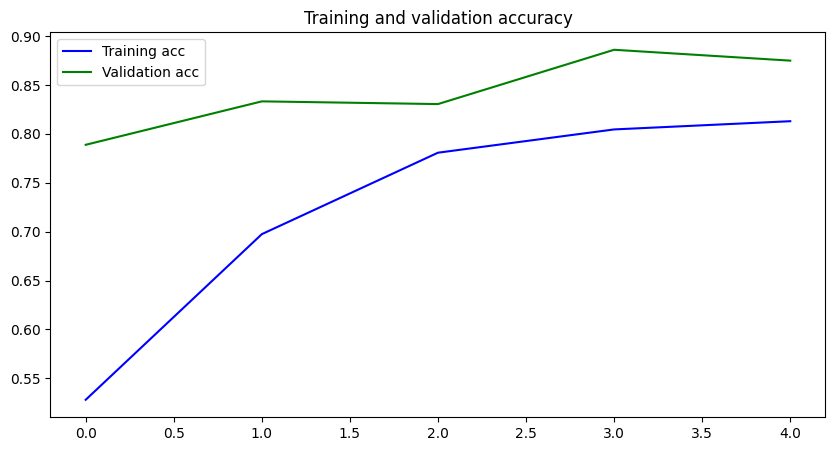

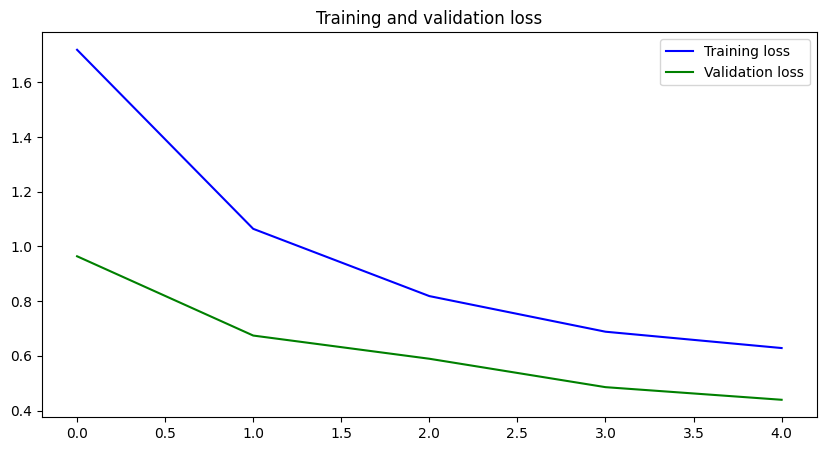

In [ ]:
def plot_history(history):
    plt.figure(figsize = (10, 5))
#     plt.style.use('dark_background')
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'b', label = 'Training acc')
    plt.plot(epochs, val_acc, 'g', label = 'Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
#     plt.figure()
    plt.figure(figsize = (10, 5))
#     plt.style.use('dark_background')
    plt.plot(epochs, loss, 'b', label = 'Training loss')
    plt.plot(epochs, val_loss, 'g', label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()


plot_history(history)

### Step 2: Freeze a half layers of base_model and fine-turning

In [ ]:
# let's take a look to see how many layers are in the base model
print('Number of layers in the base model:', len(base_model.layers))

In [ ]:
base_model.trainable = True

# fine-tune from this layer onwards
fine_tune_at = len(base_model.layers) // 2

# freeze all the layers before the 'fine_tune_at' layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

In [ ]:
len(base_model.trainable_variables)

In [ ]:
# check the trainable status of the individual layers
for layer in model.layers:
    print(layer, layer.trainable)

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = optimizers.Adam(learning_rate = LR_step2),
    metrics = ['accuracy']
)

In [ ]:
model.summary()

In [ ]:
scores = model.evaluate(test_generator, verbose=1)
print('Accuracy: %.2f%%' % (scores[1] * 100))

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.samples // test_generator.batch_size,
    epochs = 10,
    callbacks = callbacks_list
)

In [ ]:
model.save('./SaveModel/model_step2.hdf5')
model.load_weights('best_model.hdf5')

In [ ]:
scores = model.evaluate(test_generator, verbose = 1)
print('Accuracy: %.2f%%' % (scores[1] * 100))

In [ ]:
plot_history(history)

### Step 3: No Freeze Base model and full fine-turning

In [ ]:
base_model.trainable = True

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = optimizers.Adam(lr = LR_step3),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.samples // test_generator.batch_size,
    epochs = 10,
    callbacks = callbacks_list
)

In [ ]:
model.save('./SaveModel/model_step3.hdf5')
model.load_weights('best_model.hdf5')

In [ ]:
scores = model.evaluate_generator(test_generator, verbose = 1)
print('Accuracy: %.2f%%' % (scores[1] * 100))

## Final Score

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
model.load_weights('best_model.hdf5')

In [ ]:
predictions = model.predict(test_generator, verbose = 1)
predictions = np.argmax(predictions, axis = -1)         # multiple categories
label_map = (train_generator.class_indices)
label_map = dict((v, k) for k, v in label_map.items())  # flip k, v
predictions = [label_map[k] for k in predictions]

45/45 [==============================] - 9s 91ms/step


In [ ]:
filenames_with_dir = test_generator.filenames
submission = pd.DataFrame(
    {'Predict': predictions},
    columns = ['Predict'],
    index = filenames_with_dir
)
test_files.index = test_files['Id']
tmp_y = pd.concat(
    [submission['Predict'], test_files['Category']],
    axis = 1,
    sort = False
)
tmp_y.head(5)

Predict Category
jpg/image_00050.jpg      76       76
jpg/image_00138.jpg      76       76
jpg/image_02096.jpg      42       74
jpg/image_01158.jpg      73       73
jpg/image_01289.jpg      73       73

In [ ]:
print('Accuracy: %.2f%%' % (
    accuracy_score(tmp_y['Category'], tmp_y['Predict']) * 100
))

Accuracy: 87.50%


### confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

# tmp_y['Category'] là nhãn thực tế, tmp_y['Predict'] là dự đoán của mô hình
conf_matrix = confusion_matrix(tmp_y['Category'], tmp_y['Predict'])

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[10  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0 11  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  0 24  0  0  1  0  0  0  0  0  0  1  0  0]
 [ 0  0  0 10  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 39  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0 32  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  1 20  1  0  0  0  0  0  0  0]
 [ 1  0  1  0  1  0  0 46  0  0  1  0  0  0  0]
 [ 0  0  0  0  3  1  0  0 23  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 23  0  0  0  0  0]
 [ 0  0  0  0  1  0  1  0  1  1 13  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 37  0  0  0]
 [ 0  0  2  0  0  1  0  0  0  0  1  2 11  0  0]
 [ 0  3  1  0  0  0  0  0  1  0  0  2  0  9  2]
 [ 0  3  0  0  0  0  0  1  0  0  0  2  0  0  7]]


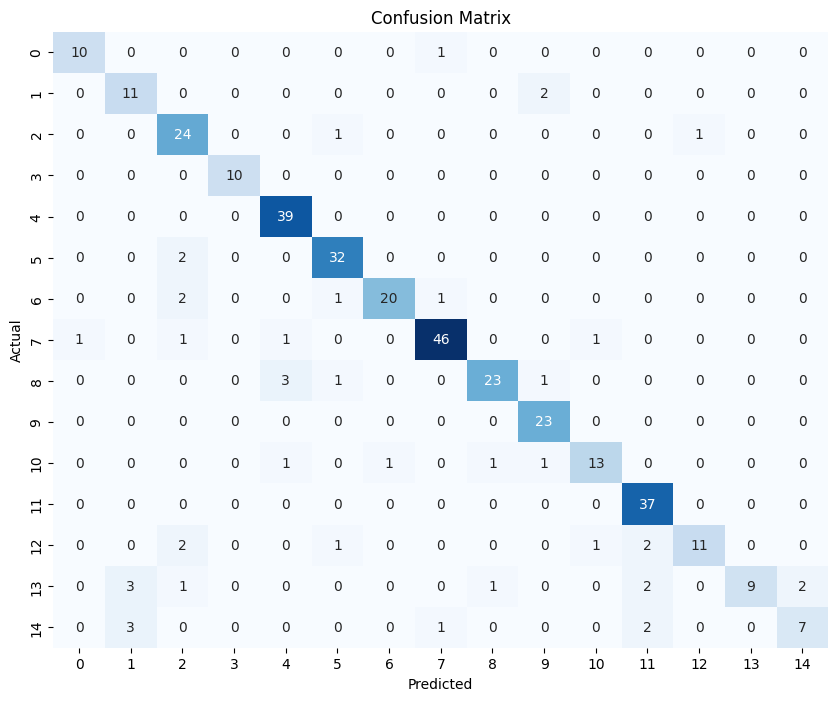

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Vẽ heatmap cho confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# In ra các trường hợp nhầm lẫn
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix)):
        if i != j and conf_matrix[i][j] > 0:
            print("Thực tế:", i, "Dự đoán:", j, "Số lượng:", conf_matrix[i][j])

Thực tế: 0 Dự đoán: 7 Số lượng: 1
Thực tế: 1 Dự đoán: 9 Số lượng: 2
Thực tế: 2 Dự đoán: 5 Số lượng: 1
Thực tế: 2 Dự đoán: 12 Số lượng: 1
Thực tế: 5 Dự đoán: 2 Số lượng: 2
Thực tế: 6 Dự đoán: 2 Số lượng: 2
Thực tế: 6 Dự đoán: 5 Số lượng: 1
Thực tế: 6 Dự đoán: 7 Số lượng: 1
Thực tế: 7 Dự đoán: 0 Số lượng: 1
Thực tế: 7 Dự đoán: 2 Số lượng: 1
Thực tế: 7 Dự đoán: 4 Số lượng: 1
Thực tế: 7 Dự đoán: 10 Số lượng: 1
Thực tế: 8 Dự đoán: 4 Số lượng: 3
Thực tế: 8 Dự đoán: 5 Số lượng: 1
Thực tế: 8 Dự đoán: 9 Số lượng: 1
Thực tế: 10 Dự đoán: 4 Số lượng: 1
Thực tế: 10 Dự đoán: 6 Số lượng: 1
Thực tế: 10 Dự đoán: 8 Số lượng: 1
Thực tế: 10 Dự đoán: 9 Số lượng: 1
Thực tế: 12 Dự đoán: 2 Số lượng: 2
Thực tế: 12 Dự đoán: 5 Số lượng: 1
Thực tế: 12 Dự đoán: 10 Số lượng: 1
Thực tế: 12 Dự đoán: 11 Số lượng: 2
Thực tế: 13 Dự đoán: 1 Số lượng: 3
Thực tế: 13 Dự đoán: 2 Số lượng: 1
Thực tế: 13 Dự đoán: 8 Số lượng: 1
Thực tế: 13 Dự đoán: 11 Số lượng: 2
Thực tế: 13 Dự đoán: 14 Số lượng: 2
Thực tế: 14 Dự đoán: 1 Số lượ

In [ ]:
# Tính tổng số lượng nhầm lẫn cho từng loại
errors_per_category = conf_matrix.sum(axis=1)

# Xây dựng bảng thống kê
error_table = []
for i, error_count in enumerate(errors_per_category):
    error_table.append({'Loại': i, 'Số lượng nhầm lẫn': error_count})

# Sắp xếp bảng thống kê theo số lượng nhầm lẫn giảm dần
error_table.sort(key=lambda x: x['Số lượng nhầm lẫn'], reverse=True)

# In bảng thống kê
print("Bảng thống kê số loại bị nhầm lẫn nhiều nhất từ cao đến thấp:")
for item in error_table:
    print("Loại:", item['Loại'], "- Số lượng nhầm lẫn:", item['Số lượng nhầm lẫn'])

Bảng thống kê số loại bị nhầm lẫn nhiều nhất từ cao đến thấp:
Loại: 7 - Số lượng nhầm lẫn: 50
Loại: 4 - Số lượng nhầm lẫn: 39
Loại: 11 - Số lượng nhầm lẫn: 37
Loại: 5 - Số lượng nhầm lẫn: 34
Loại: 8 - Số lượng nhầm lẫn: 28
Loại: 2 - Số lượng nhầm lẫn: 26
Loại: 6 - Số lượng nhầm lẫn: 24
Loại: 9 - Số lượng nhầm lẫn: 23
Loại: 13 - Số lượng nhầm lẫn: 18
Loại: 10 - Số lượng nhầm lẫn: 17
Loại: 12 - Số lượng nhầm lẫn: 17
Loại: 1 - Số lượng nhầm lẫn: 13
Loại: 14 - Số lượng nhầm lẫn: 13
Loại: 0 - Số lượng nhầm lẫn: 11
Loại: 3 - Số lượng nhầm lẫn: 10


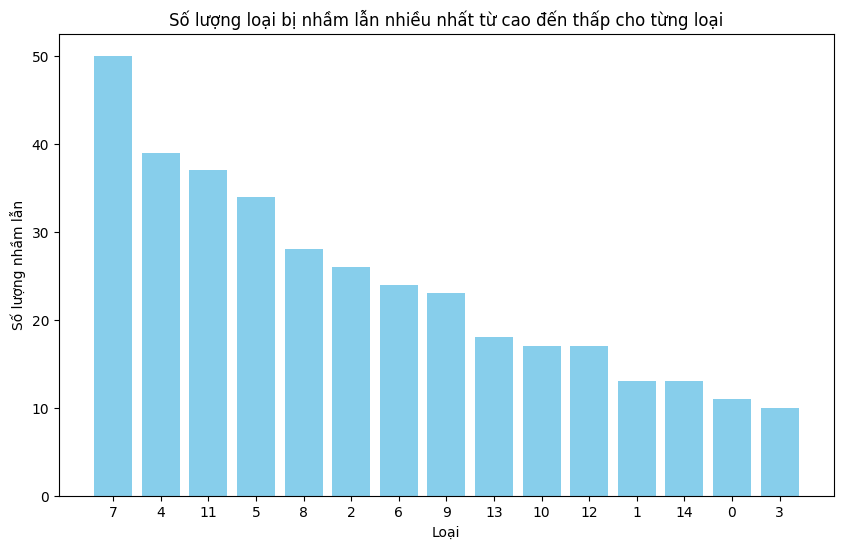

In [ ]:
# Lấy thông tin để vẽ biểu đồ
categories = [str(item['Loại']) for item in error_table[0:15]]
errors = [item['Số lượng nhầm lẫn'] for item in error_table[0:15]]

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.bar(categories, errors, color='skyblue')
plt.xlabel('Loại')
plt.ylabel('Số lượng nhầm lẫn')
plt.title('Số lượng loại bị nhầm lẫn nhiều nhất từ cao đến thấp cho từng loại')
plt.xticks(categories)
plt.show()


Category: ['48', '76', '42', '72', '89', '73', '81', '95', '88', '77', '37', '39', '83', '96', '74']

In [ ]:
print(categories)

['7', '4', '11', '5', '8', '2', '6', '9', '13', '10', '12', '1', '14', '0', '3']


Đây là các 15 loại nhầm lẫn nhiều nhất.
Công việc tiếp theo:
- Tính ra % chính xác của model efficientnetB6 với 15 loại này (dự đoán sẽ giảm so với 84% trên toàn bộ tập dữ liệu)
- Cắt bộ dữ liệu ra 15 loại
- Huấn luyện trên model Lenet5 với 37tr tham số, Alexnet, GoogleNet và thống kê kết quả

tính độ chính xác của 15 loại trên best model efficientNetB6:
- phải huấn luyện lại mô hình trên 15 loại này
- rồi đánh giá lại, mà huấn luyện rất mất thời gian, chắc là dùng lại model hiện giờ luôn.